<a href="https://colab.research.google.com/github/joanvelja/joanvelja/blob/main/W8_ObjectDetectionRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 8 Tutorial - Object Detection Using Faster R-CNN


In [ ]:
!git clone https://github.com/GitarthVaishnav/FasterRCNN42028.git

Cloning into 'FasterRCNN42028'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 95 (delta 31), reused 90 (delta 27), pack-reused 0
Unpacking objects: 100% (95/95), 4.27 MiB | 7.60 MiB/s, done.


In [ ]:
%cd FasterRCNN42028/

/content/FasterRCNN42028


In [ ]:
## !pip install -r requirements.txt

### **Downloading dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd content/FasterRCNN42028
!unzip /content/drive/42028/Week8/data.zip

/bin/bash: line 0: cd: content/FasterRCNN42028: No such file or directory
unzip:  cannot find or open /content/drive/42028/Week8/data.zip, /content/drive/42028/Week8/data.zip.zip or /content/drive/42028/Week8/data.zip.ZIP.


## Create the Custom Dataset YAML File.

In [ ]:
%%writefile data_configs/custom_data.yaml

TRAIN_DIR_IMAGES: '/content/drive/MyDrive/42028/Week8/FasterRCNN/data/images/train'
TRAIN_DIR_LABELS: '/content/drive/MyDrive/42028/Week8/FasterRCNN/data/images/train'
VALID_DIR_IMAGES: '/content/drive/MyDrive/42028/Week8/FasterRCNN/data/images/valid'
VALID_DIR_LABELS: '/content/drive/MyDrive/42028/Week8/FasterRCNN/data/images/valid'


# Classes declaration: 
CLASSES: [
    '__background__',
    'date',
    'fig',
    'chocolate',
    'hazelnut'
]

# Number of classes (always background + n):
NC: 5

SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


### **Training**

In [ ]:
!wandb disabled

W&B disabled.


In [ ]:
!python train.py --config data_configs/custom_data.yaml --epochs 30 --model fasterrcnn_resnet50_fpn_v2 --project-name training --batch-size 6 --no-mosaic

Not using distributed mode
device cuda
2023-04-18 08:11:44.100547: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 08:11:45.169896: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Creating data loaders
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Number of training samples: 1

### **Results**

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

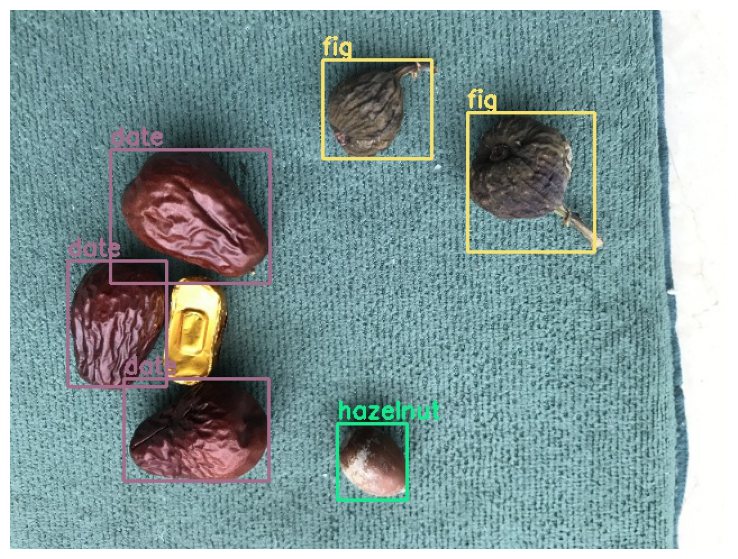

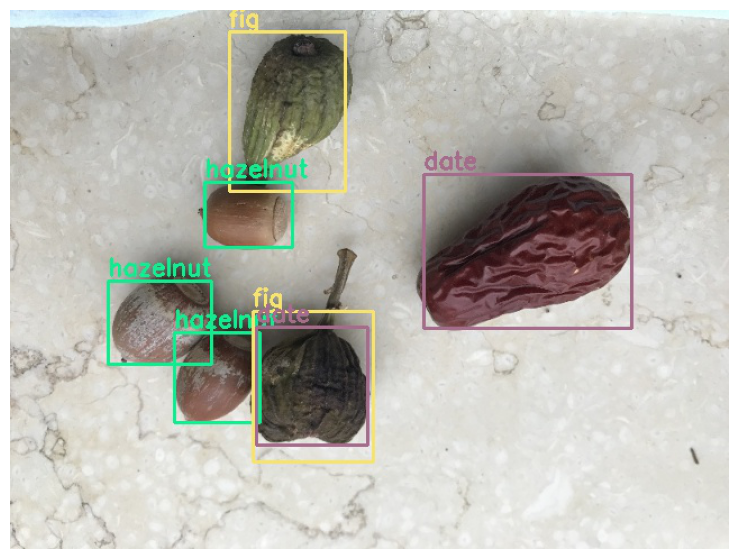

In [ ]:
results_dir_path = "/content/FasterRCNN42028/outputs/training/training"
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### **Evaluation**

In [ ]:
!python eval.py --weights outputs/training/training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 1/1 [00:01<00:00,  1.29s/it]


{'map': tensor(0.7696),
 'map_50': tensor(1.),
 'map_75': tensor(0.9175),
 'map_large': tensor(0.7371),
 'map_medium': tensor(0.7911),
 'map_per_class': tensor([0.8752, 0.6515, 0.7822]),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.4167),
 'mar_10': tensor(0.7833),
 'mar_100': tensor(0.7833),
 'mar_100_per_class': tensor([0.8750, 0.6500, 0.8250]),
 'mar_large': tensor(0.7375),
 'mar_medium': tensor(0.8125),
 'mar_small': tensor(-1.)}


"Classes: ['__background__', 'date', 'fig', 'choc

## **Inference**

In [ ]:
!python inference.py --input /content/drive/MyDrive/42028/Week8/FasterRCNN/data/images/train --weights outputs/training/training/best_model.pth

Building from model name arguments...
Test instances: 16
Image 1 done...
--------------------------------------------------
Image 2 done...
--------------------------------------------------
Image 3 done...
--------------------------------------------------
Image 4 done...
--------------------------------------------------
Image 5 done...
--------------------------------------------------
Image 6 done...
--------------------------------------------------
Image 7 done...
--------------------------------------------------
Image 8 done...
--------------------------------------------------
Image 9 done...
--------------------------------------------------
Image 10 done...
--------------------------------------------------
Image 11 done...
--------------------------------------------------
Image 12 done...
--------------------------------------------------
Image 13 done...
--------------------------------------------------
Image 14 done...
--------------------------------------------------


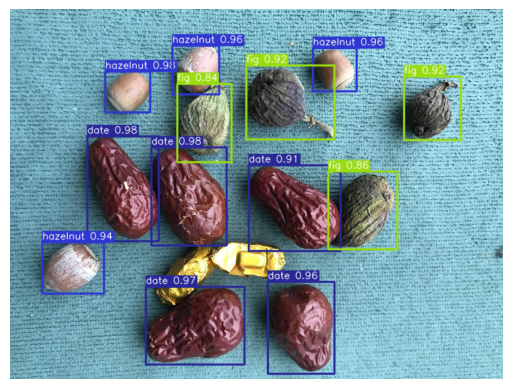

In [ ]:
image = plt.imread('outputs/inference/res_1/12.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()